In [1]:
# pip install findspark
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("SVD") \
        .config("spark.driver.memory", "4g") \
        .getOrCreate()

In [3]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

spark.sparkContext._conf.getAll()  # check the config

C:\Spark\spark-3.5.3-bin-hadoop3\python\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.driver.memory', '4g'),
 ('spark.driver.host', 'LAPTOP-0EQ25VHR'),
 ('spark.app.id', 'local-173

In [4]:
user_movie_matrix = spark.read.csv('hdfs://localhost:9001/test/user_movie_matrix.csv', header=True, inferSchema=True)
#parallelize the data

In [6]:
from scipy.sparse import csr_matrix

sparse_user_movie_matrix = csr_matrix(user_movie_matrix.toPandas().values)

In [7]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(sparse_user_movie_matrix, k=20)  # k: numero di feature latenti

In [9]:
import numpy as np
from scipy.linalg import sqrtm

sigma = np.diag(sigma)

root_sigma = sqrtm(sigma)

U = np.dot(U, root_sigma)

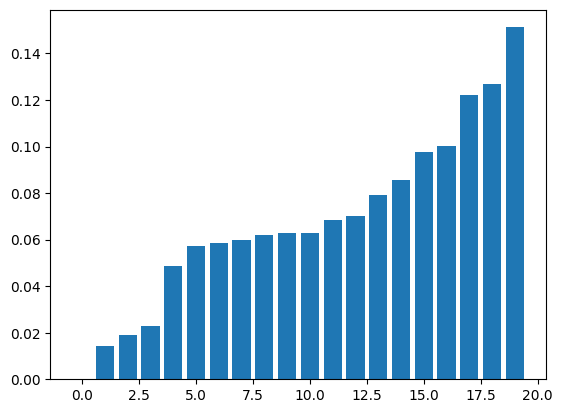

In [10]:
utente = 2

import matplotlib.pyplot as plt

U = np.sort(U)
U_scaled = U[utente] - U[utente].min()
# U_scaled /= U_scaled.max()
plt.bar(range(20), U_scaled)
plt.show()

In [11]:
approx_user_movie_matrix = np.dot(np.dot(U, sigma), Vt)

In [13]:
import pandas as pd

user_movie_predictions = pd.DataFrame(approx_user_movie_matrix, columns=user_movie_matrix.columns)

In [14]:
print("Matrice predetta:\n", user_movie_predictions.head())

Matrice predetta:
         userId         1         2         3         4         5         6  \
0  8105.416924  4.808841 -5.199456 -4.122377 -0.716273  0.035567 -7.727002   
1  2386.627472  4.131228  0.109229  0.834992  0.014072  1.270701  1.333435   
2   853.074537  0.472235 -0.144052 -0.554480 -0.094388 -0.141923 -0.707362   
3  6134.500070  1.107143 -4.950431 -3.587269 -0.536030 -0.434473 -6.379320   
4  1667.860273  0.967236 -3.203716 -0.907207  0.071357  0.981206 -1.255702   

          7         8         9  ...    193565    193567    193571    193573  \
0 -0.740678 -1.653175  4.730518  ...  0.306625  0.262822  0.350429  0.350429   
1  0.985880 -0.120296  1.246394  ...  0.057786  0.049531  0.066041  0.066041   
2 -0.272009 -0.138418  0.281571  ...  0.027246  0.023353  0.031138  0.031138   
3 -1.361857 -1.249424  3.158442  ...  0.256527  0.219880  0.293174  0.293174   
4  0.993124 -0.589944  2.037125  ...  0.090242  0.077350  0.103133  0.103133   

     193579    193581    193583